In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as soup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen as uReq

# Taking the URL link 

In [2]:
url = 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber='

# Looping all the URL

In [3]:
url_list =[]
for i in range(1,51):
    url_list.append(url+str(i))

In [4]:
url_list[:5]

['https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=2',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=3',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=4',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=5']

# Creating Page_soup  for all the URLs

In [9]:
page_soup_list = []
for i in range(len(url_list)):
    ur = url_list[i]
    uClinet = uReq(ur)
    page_html = uClinet.read()
    uClinet.close()
    page_soup =soup(page_html,'html.parser')
    page_soup_list.append(page_soup)

In [8]:
page_soup_list[0]

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="//images-eu.ssl-images-amazon.com" rel="dns-prefetch"/><link href="//m.media-amazon.com" rel="dns-prefetch"/><link href="//completion.amazon.com" rel="dns-prefetch"/><!-- sp:feature:aui-assets -->
<link href="https://images-eu.ssl-images-amazon.com/images/I/41YNcL3lZpL._RC|51giv2WPknL.css,01evdoiemkL.css,01K+Ps1DeEL.css,31bAdTWQ3tL.css,01tgK36lpGL.css,11UGC+GXOPL.css,21LK7jaicML.css,11L58Qpo0GL.css,21EuGTxgpoL.css,01Xl9KigtzL.css,01YhS3Cs-hL.css,21GwE3cR-yL.css,019SHZnt8RL.css,01wAWQRgXzL.css,21bWcRJYNIL.css,11WgRxUdJRL.css,01dU8+SPlFL.css,11ocrgKoE-L.css,01SHjPML6tL.css,111-D2qRjiL.css,01QrWuRrZ-L.css,310Imb6LqFL.css,11Z1a0FxSIL.css,01cbS3UK11L.css,21mOLw+nYYL.css,01L8Y-JFEhL.css_.css?AU

# Extracting Ratings alone from the page_content

In [55]:
rating = []
for i in range(len(page_soup_list)):
    i = page_soup_list[i]
    rat = i.find_all('span',{'class':'a-icon-alt'})
    for i in range(3,len(rat)-5): # the range is specified since it takes the unwanted ratings from the page
        rating.append(rat[i].text.split(' ')[0])    

In [56]:
len(rating)

500

# Extracting Reviews and Title from Each user

In [57]:
r2=['','Report abuse','\nThere was a problem loading comments right now. Please try again later.','\n',
    'Select the department you want to search in','© 1996-2019, Amazon.com, Inc. or its affiliates']
n =[]
for i in range(len(page_soup_list)):
    i = page_soup_list[i]
    rev = i.find_all('span',{'class':''})
    r =[]
    for j in rev:
        r.append(j.text)
    for k in r:
        if k not in r2:
            n.append(k)

In [58]:
review=[]
title=[]
for i in range(0,len(n)):
    if i%2==1:
        review.append(n[i])
    if i%2==0:
        title.append(n[i])

Creating Dataframe and appending all the extracted columns

In [59]:
final = pd.DataFrame([title,review,rating],index=['Title','Review','Rating'])
final = final.T

In [60]:
final.head()

,Title,Review,Rating
0,Go for any other company rather than this comp...,OnePlus you trash I bought new OnePlus 6t on J...,1.0
1,Worst performance,Camera was shutting off suddenly and charging ...,4.0
2,Best phone,Best phone,5.0
3,Mobile is good know at reasonable cost.,"Everything is fine & up to the mark, with reas...",4.0
4,Satisfied :),The delivery was fast and the phone is awesome...,5.0


In [61]:
final.to_csv('Oneplus6T-Review.csv',header=True)

# Word Cloud For Oneplus 6T Reviews

In [62]:
x = final['Review']

In [63]:
import re

In [64]:
x[0:5]

0    OnePlus you trash I bought new OnePlus 6t on J...
1    Camera was shutting off suddenly and charging ...
2                                           Best phone
3    Everything is fine & up to the mark, with reas...
4    The delivery was fast and the phone is awesome...
Name: Review, dtype: object

In [65]:
x  = ' '.join(x)

In [66]:
x = re.sub('[0-9]','',x)

In [67]:
from nltk.tokenize import RegexpTokenizer

In [68]:
tokenizer = RegexpTokenizer(r'\w+')

In [69]:
x = tokenizer.tokenize(x)

In [70]:
from nltk.corpus import stopwords

In [71]:
x = [i.lower() for i in x]

In [72]:
en_stops = stopwords.words('english')
# appending the stpwords with some frequently unwanted words 
en_stops.append('got')
en_stops.append('day')
en_stops.append('even')
en_stops.append('go')
en_stops.append('time')
en_stops.append('product')
en_stops.append('phone')
a = [ i for i in x if i not in en_stops]

In [73]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [74]:
c=[]
for i in a:
    c.append(lemm.lemmatize(i))   

In [75]:
cnt = pd.Series(c)

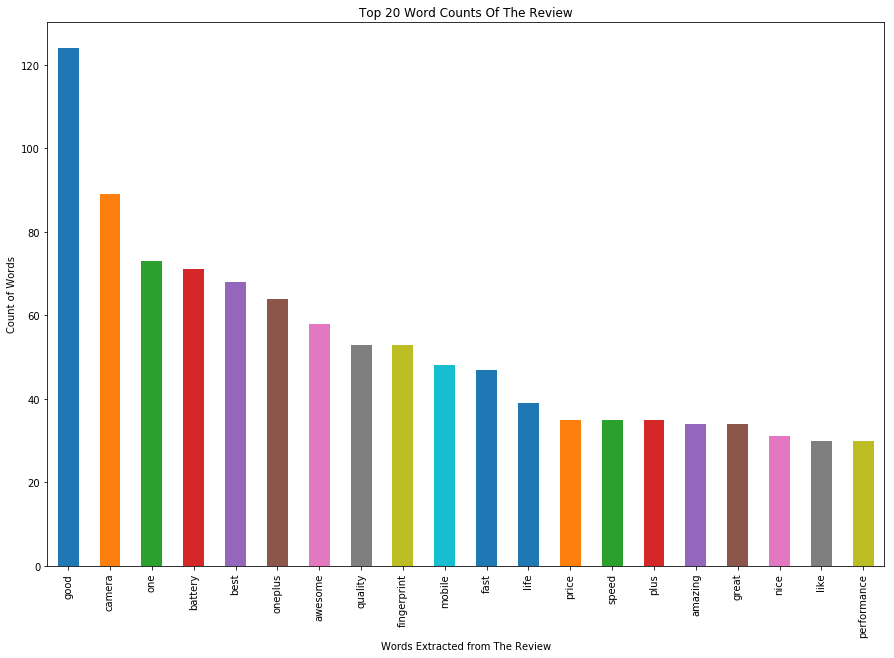

In [76]:
plt.figure(figsize=(15,10))
cnt.value_counts().head(20).plot.bar()
plt.xlabel("Words Extracted from The Review")
plt.ylabel("Count of Words")
plt.title('Top 20 Word Counts Of The Review')
plt.show()

In [77]:
c = ' '.join(c)

In [78]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

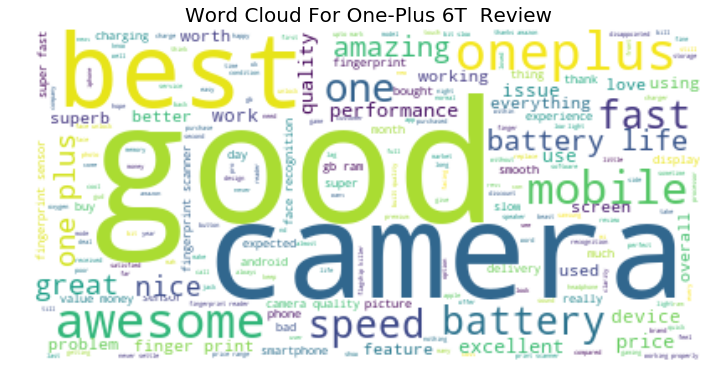

In [79]:
wordcloud = WordCloud(background_color='white').generate(c)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For One-Plus 6T  Review',{'fontsize':20},loc ='center')
plt.show()

In [92]:
wordcloud.to_file("C:/Users/manoj/OneDrive/Desktop/M.M/Text Mining/Day 4/Oneplus6T_review.png")

# Modeling to extract sentimental Analysis

In [80]:
from textblob import TextBlob

In [81]:
x = final['Review']
s=[]

In [82]:
for i in range(len(x)):
    analysis = TextBlob(x[i])
    #print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        s.append( 'Positive')
    else:
        s.append('Negative')

In [83]:
s = pd.Series(s)

In [84]:
Sentiment = pd.DataFrame([x,s],index=['Review','Sentiment'])

In [85]:
Sentiment = Sentiment.T

In [86]:
Sentiment.head(25)

,Review,Sentiment
0,OnePlus you trash I bought new OnePlus 6t on J...,Negative
1,Camera was shutting off suddenly and charging ...,Negative
2,Best phone,Positive
3,"Everything is fine & up to the mark, with reas...",Positive
4,The delivery was fast and the phone is awesome...,Positive
5,all the features are awesome,Positive
6,"Fingerprint reader although cool, is sluggish",Positive
7,Very complicated product se very good,Positive
8,Good device but want to see what difference wi...,Positive
9,Perfect at this price,Positive


In [87]:
count =Sentiment.groupby('Sentiment').count()
count

,Review
Sentiment,
Negative,131
Positive,369


In [88]:
Negative_count = count.Review[0]
Positive_count = count.Review[1]

In [89]:
print('Positive Review percentage for ONE-PLUS 6T is :',((Positive_count/(Positive_count + Negative_count))*100),'%')
print('Negative Review percentage for ONE-PLUS 6T is :',((Negative_count/(Positive_count + Negative_count))*100),'%')

Positive Review percentage for ONE-PLUS 6T is : 73.8 %
Negative Review percentage for ONE-PLUS 6T is : 26.200000000000003 %
